# Assignment 3-2 : Identifying CIFAR-10 Images

X_train shape:  (50000, 32, 32, 3)
50000  train samples
10000  test samples
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_21 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 512)    

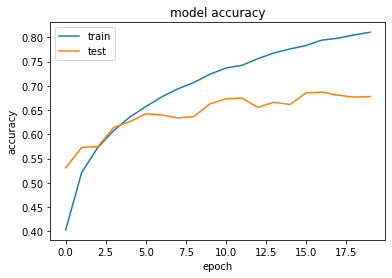

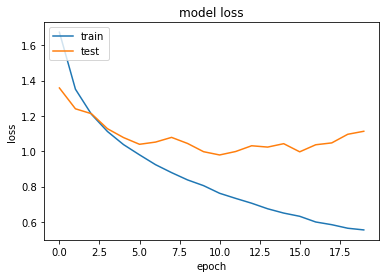

In [6]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# constants
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], ' train samples')
print(X_test.shape[0], ' test samples')

# convert to catagorical 
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same',
                input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# network with 512 units and ReLU activation
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
             metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE,
          epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,
          verbose=VERBOSE)
score = model.evaluate(X_test, Y_test,
                      batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score: ", score[0])
print('Test accuracy: ', score[1])

# Save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
# Save weights
model.save_weights('cifar10_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




X_train shape:  (50000, 32, 32, 3)
50000  train samples
10000  test samples
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_24 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_25 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 16, 16, 

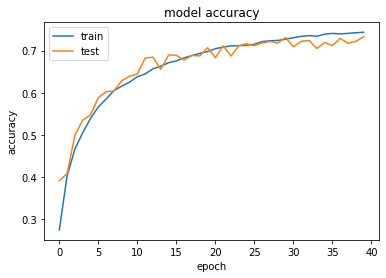

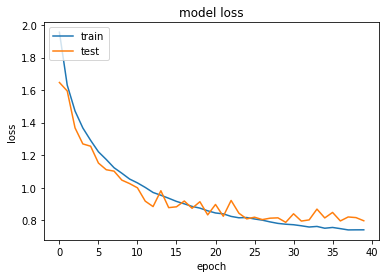

In [7]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# constants
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], ' train samples')
print(X_test.shape[0], ' test samples')

# convert to catagorical 
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same',
                input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# network with 512 units and ReLU activation

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
             metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE,
          epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,
          verbose=VERBOSE)
score = model.evaluate(X_test, Y_test,
                      batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score: ", score[0])
print('Test accuracy: ', score[1])

# Save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
# Save weights
model.save_weights('cifar10_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




X_train shape:  (50000, 32, 32, 3)
50000  train samples
10000  test samples
Augmenting training set images...
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_60 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_61 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_

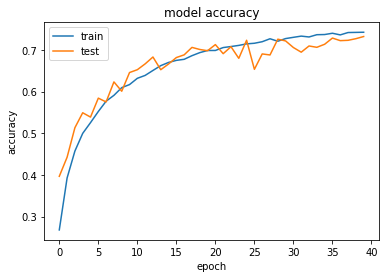

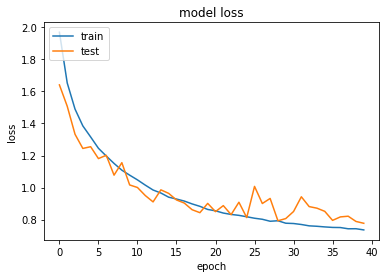

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
NUM_TO_AUGMENT = 5

# constants
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], ' train samples')
print(X_test.shape[0], ' test samples')

# Augment
print("Augmenting training set images...")
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
xtas, ytas = [], []

for i in range (X_train.shape[0]):
    num_aug = 0
    x = X_train[i] # (3, 32, 32)
    x = x.reshape((1,) + x.shape) # (1, 3, 32, 32)
for x_aug in datagen.flow(x, batch_size = 32,
                         save_to_dir='preview',
                         save_prefix='cifar',
                         save_format='jpeg'):
    # print(x_aug.shape)
    if(num_aug >= NUM_TO_AUGMENT):
        num_aug = 0;
        break
    else:
        #xtas.append(x_aug[0])
        num_aug += 1

# convert to catagorical 
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same',
                input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# network with 512 units and ReLU activation
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
             metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
    epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
    verbose=VERBOSE)

score = model.evaluate(X_test, Y_test,
                      batch_size=BATCH_SIZE, verbose=VERBOSE)

print("Test score: ", score[0])
print('Test accuracy: ', score[1])

# Save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
# Save weights
model.save_weights('cifar10_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [6]:
import numpy as np
import scipy.misc
from keras.models import model_from_json
from keras.optimizers import SGD

# load model
model_architecture = 'cifar10_architecture.json'
model_weights = 'cifar10_weights.h5'
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

# load images
img_names = ['cat-standing.jpg', 'dog.jpg']
imgs = [np.transpose(scipy.misc.imresize(scipy.misc.imread(img_name),
                                        (32, 32)),
                    (1, 0, 2)).astype('float32')
       for img_name in img_names]
imgs = np.array(imgs) / 255
    
# Train
optim = SGD()
model.compile(loss='categorical_crossentropy', optimizer=optim,
    metrics=['accuracy'])
 
# Predict
predictions = model.predict_classes(imgs)
print(predictions)


AttributeError: module 'scipy.misc' has no attribute 'imresize'

In [ ]:
"NOTE: The latest version of scipy no longer supports the above commands"

In [ ]:
"""
Assignment 3-2 : Identifying CIFAR-10 Images

When considering what is ethical to 'train' a computer to recognize, human faces and their environment
come to mind. Currently, there are a variety of consumer level products that use the technology
to discern different people from one another, and this data is used for various purposes. However,
is there cause for concern when these products are brought into our homes and allowed full access
to our private life?

One such product (as mentioned in a previous discussion post) is Meta's latest foray into the 
hardware market, the "Portal". Designed as a device that allows users to video chat with others
or present to an audience from the comfort of your home, the Portal employs various technologies
that allow it to recognize a person and follow them around the space that they are in. The details
of how it does this are intricate, and as such this write-up will focus on the ethical concerns that
users may or may not have when considering this technology.

Various technology hubs have reported extensively on the Portal, and while the general consensus
is that it is 'safe' and private, there are some concerns that have come to light regarding
the data that the Portal has access to and transfers to Meta (the parent company of Facebook). Most
alarmingly, Facebook has told various publications that it does in fact use Portal to collect various
usage data in order to serve ads to users on other platforms (Terekhov). While this data collection is minimal
(for now) it is still something that users should consider when purchasing a Portal.

Digging deeper into the Portal and the technology within it's silicon, it can be assumed that the
device is able to discern between different people within the home. If this is the case, the device
could potentially be used to identify particular people and link them to various online profiles.
Likewise, the technology must discern human faces from backgrounds, meaning that it must know what
objects are in a persons home by simply viewing it. This implication leads one to believe that the
device could potentially be used to build particular types of data profiles about users. Shopping
habits, exercise schedules, even overall wealth could be devised based on background information
in users' videos. While this is very much an extreme scenario, and Facebook has assured users that
it does not collect any such data (Bates), the idea that it could potentially happen is worrisome. 

In general, any technology that can distinguish a person's face from another person's face is
somewhat of cause for concern because such things are very rarely used for non-nefarious purposes.
A person's face is the the main part of their uniqueness and their identification. Software trained
to recognize peoples faces can be used to track them in real time like some TV shows would have us
believe already takes place. They could be used to push very focused ad campaigns towards us and
even help to shape our opinions about things like politics or ethics simply based on the demographic
information found in our face. 

On the other end of the spectrum, if the trained algorithm was to be
innacurate in discerning certain faces from others, this could result in other issues like 
accidental profiling or fugitive reporting in the event a crime was committed. The algorithm above
only has an accuracy rating of 71% when viewing images of different animals. Human faces are far more
complex and some can look very similar. Consider a suspect in a crime on the run, and facial 
recognition software attempting to track them reports any other person it spots that looks
70% like the wanted individual. This would result in a lot of unecessary arrests and wasted time
for the police, while the suspect could still pose a danger to the community. 

China has taken a step similar to the one just mentioned above, in the form of a "social credit" system. 
In China, facial tracking software is used to conduct surveilance on citizens, making note of anything
they do that is deemed "untrustworthy" in any way. While it is not directly reported that AI and facial
recognition are deployed, nor is facial tracking the only way citizens are surveiled, China makes
a variety of services that require a person's face to be registered in order to use them. With many
citizens faces in a database, it is relatively easy for China to track each person's movements and 
thus, their actions. These actions are then compiled to create a social credit profile that is then used
to determine benefits that citizens have access to. Gaining employment can be much easier with a high
social credit score, low scores can make employment harder to procure. This is absolutely an ethics issue,
but unfortunately China is a communist society in which citizens have very little rights. 

While facial recognizing software does have it's uses and has the potential to make some aspects
of our daily lives easier, in this authors opinion the potential for negative uses far outweigh 
these benefits. Only in very regulated circumstances with total transparency should this technology
be considered for use.

References

Bates, P. (2019, November 8). Can you trust facebook portal devices with your privacy? 
    MUO. Retrieved September 6, 2022, from 
    https://www.makeuseof.com/tag/trust-facebook-portal-privacy/ 
    
Donnelly, D. (2022, July 22). China Social Credit System explained - how it works [2022]. 
    Horizons. Retrieved September 13, 2022, from https://nhglobalpartners.com/china-
    social-credit-system-explained/ 
   
Terekhov, A. (2018, November 8). Facebook portal privacy issues continue as it admits 
    to collecting user data. Hotspot Shield VPN. Retrieved September 6, 2022, from 
    https://www.hotspotshield.com/blog/facebook-portal-privacy/ 

"""